# Python Toolkit for VEDAI dataset

In [1]:
from Tools import get_image_path, visualize_annotations, \
                visualize_prediction, load_prediction_txt, \
                evaluate, precision_recall_11points, recall_FPPI

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

## 1. Visualize the annotations

/media/guang/NTFS_Partition_small/VEDAI/Vehicules1024/00000027_co.png


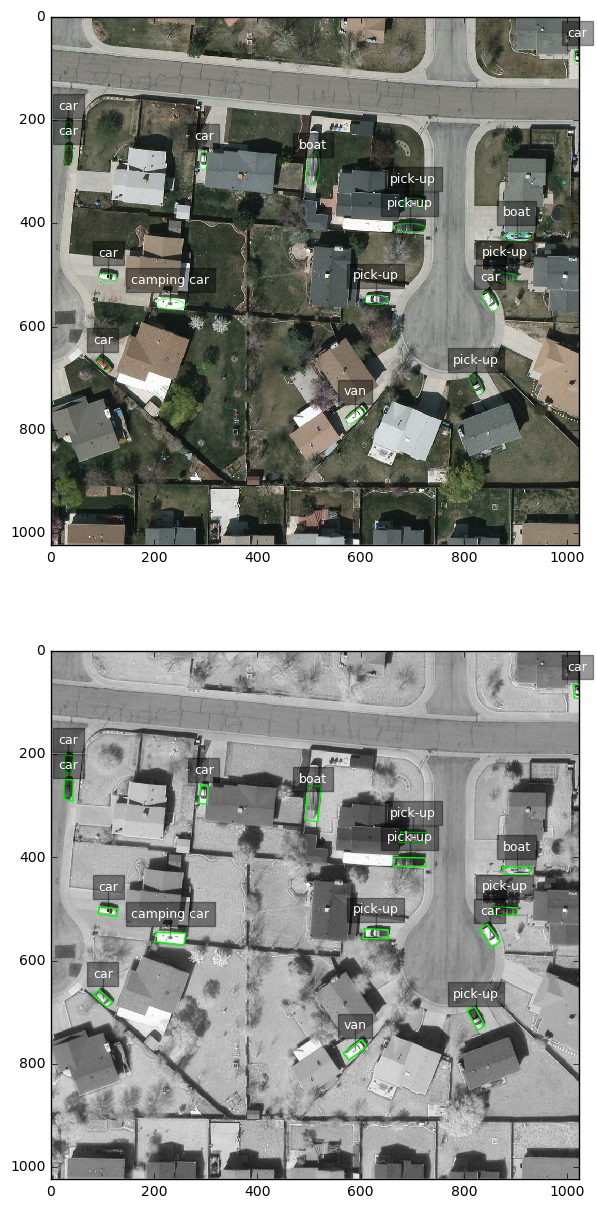

In [3]:
image_id = 27
print get_image_path(image_id)
plt.subplot(2,1,1)
visualize_annotations(image_id, vehicle_shape='ellipse')
plt.subplot(2,1,2)
visualize_annotations(image_id, vehicle_shape='polygon', image_type='ir')

## 2. Load a prediction file and visualize some result

In [4]:
prediction = load_prediction_txt('example_det_results/car_01.txt') 

   image_id    x    y      score
63       27  822  712    1.44956
64       27  849  554    1.44627
65       27  103  669   0.911218
66       27  638  548   0.895881
67       27  110  501   0.841022
68       27   34  218    0.54293
69       27   34  270   0.489567
70       27  588  776   0.363784
71       27  298  271   0.262107
72       27  951  735   0.202065
73       27  708  360  0.0885391


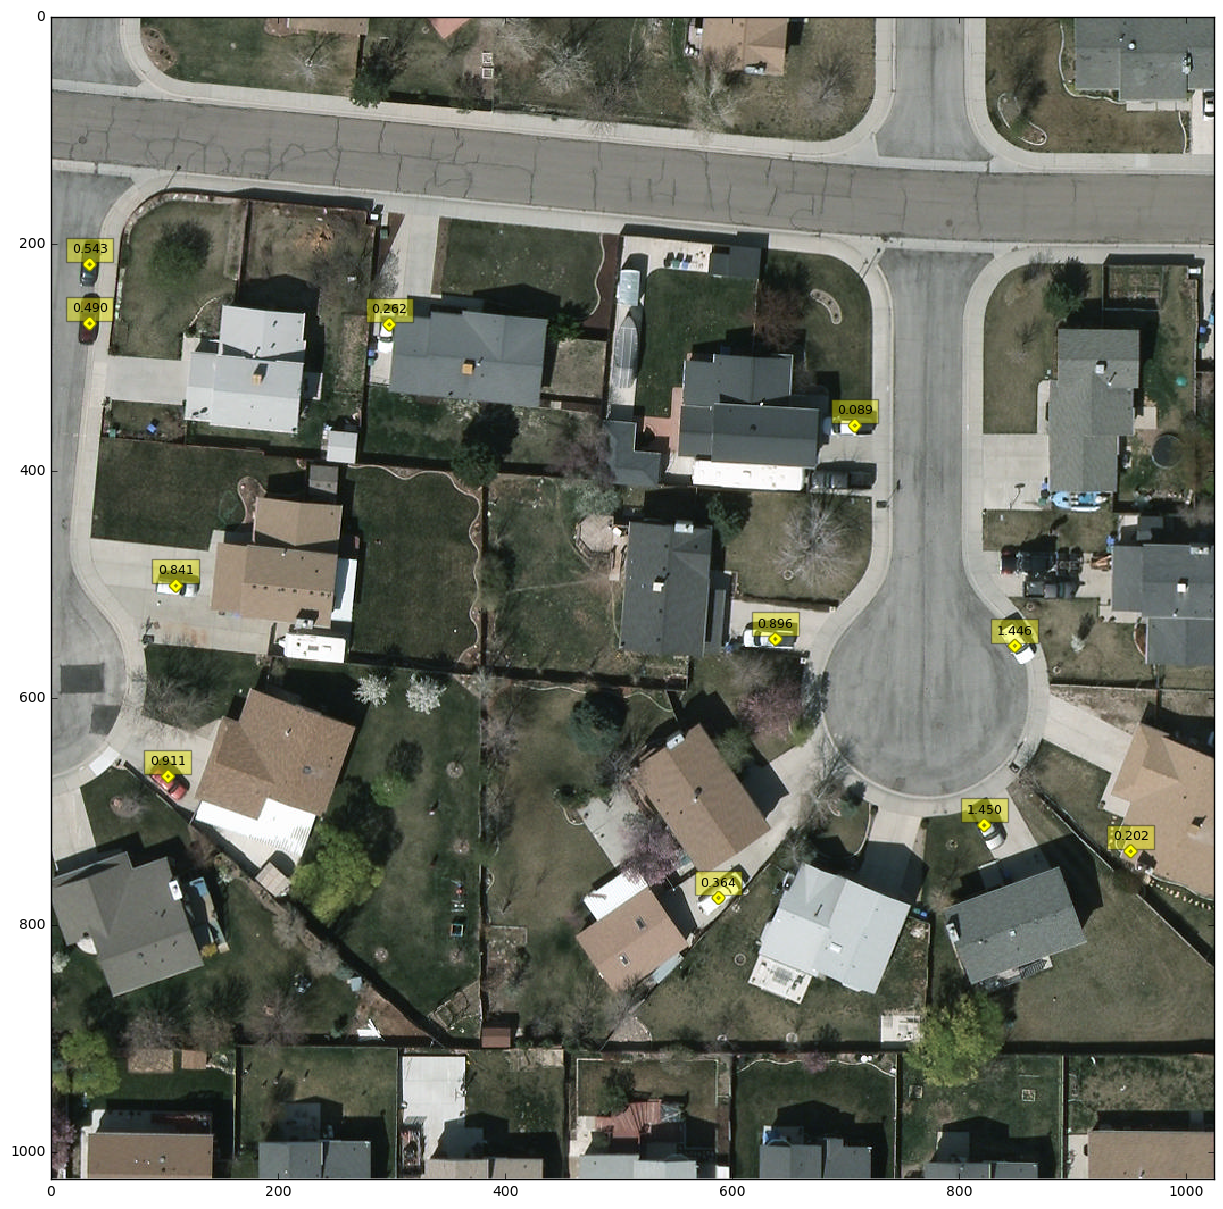

In [5]:
visualize_prediction(image_id, prediction, thres=0.0, vehicle_marker='D', verbose=True)

We can even make a collision detection!

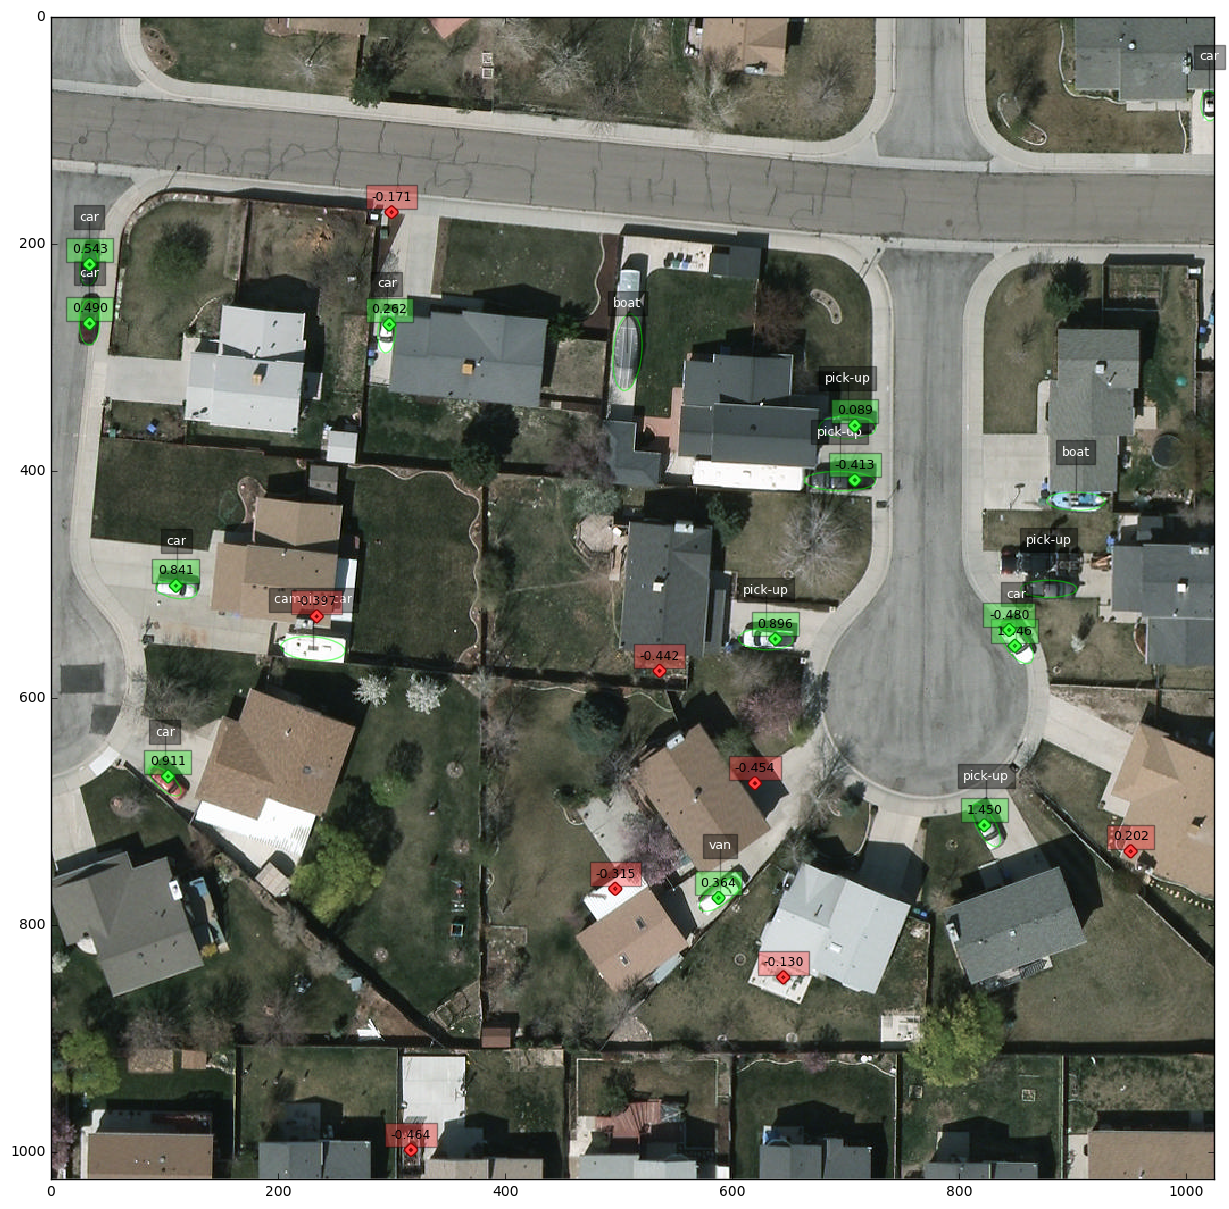

In [6]:
# (Optional) Firstly let's show the annotations.
visualize_annotations(image_id, vehicle_shape='ellipse')

# And then visualize detection results.
visualize_prediction(image_id, prediction, thres=-0.5, vehicle_marker='D', collision_detection=True)

## 3. Evaluation

The example result files are made for MATLAB. So the index starts from 1 instead of 0. 
So "car_01.txt" is actually for fold 0 here.

In [7]:
eval_results= evaluate(prediction, 'car', fold=0)

Tools.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gt_this_class['recalled'] = False
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Fold: 0. Total number of "car" instances: 134


If you see a `SettingWithCopyWarning` here, please just ignore it.
The results are recorded in a pandas DataFrame, including precision vs. recall vs. FPPI.
Let's show it below:

In [8]:
eval_results.head(10)

score nb_pos nb_neg precision      recall        FPPI
0  2.51677      1      0         1  0.00746269           0
1  2.32442      2      0         1   0.0149254           0
2  2.30469      3      0         1   0.0223881           0
3  2.17237      4      0         1   0.0298507           0
4  2.12849      5      1  0.833333   0.0373134  0.00826446
5  2.06765      6      2      0.75   0.0447761   0.0165289
6  2.02614      7      2  0.777778   0.0522388   0.0165289
7   2.0005      8      2       0.8   0.0597015   0.0165289
8   1.9588      9      2  0.818182   0.0671642   0.0165289
9  1.89563     10      2  0.833333   0.0746269   0.0165289

### 3.1 Draw a Precision-Recall Curve

In [9]:
plt.rcParams['figure.figsize'] = (5, 5)

#### a. "Raw" version

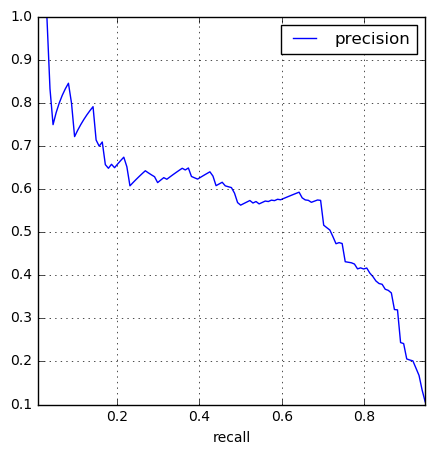

In [10]:
eval_results.plot(y='precision', x='recall', grid=True)

#### b. "11 Points" version

In [11]:
recalls, precisions, ap = precision_recall_11points(eval_results)

AP: 0.552849681984


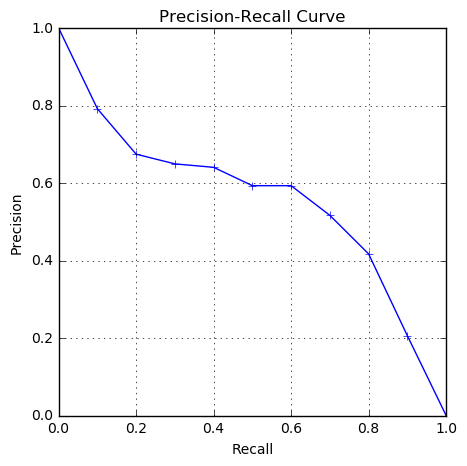

In [12]:
plt.figure()
plt.plot(recalls, precisions, marker='+')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])  
plt.ylabel('Precision')
plt.xlabel('Recall')    
plt.title('Precision-Recall Curve')    
print 'AP:', ap

### 3.2 Show Recall vs. FPPI

#### a. "Raw" version

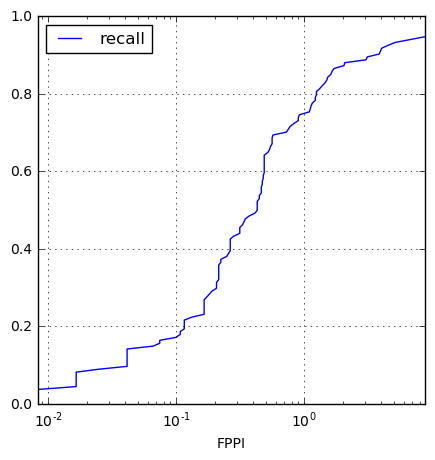

In [13]:
eval_results.plot(x='FPPI', y='recall', logx=True, grid=True)

#### b. Linear interpolated version

In [14]:
rvf = recall_FPPI(eval_results)

In [15]:
for fppi, recall in rvf.iteritems():
    print 'FPPI: {}\tRecall:{}'.format(fppi, recall)

FPPI: 1.0	Recall:0.749660786974
FPPI: 10.0	Recall:0.94776119403
FPPI: 0.001	Recall:0.0307537313433
FPPI: 0.1	Recall:0.172388059701
FPPI: 0.01	Recall:0.0388805970149
